# Predicting Student Math Performance Using Linear Regression

1. Load and preprocess the dataset (categorical encoding)
2. Visualize distributions and feature correlations
3. Build a multiple linear regression model
4. Analyze effects of test prep and parental education
5. Evaluate model performance (R², MAE, RMSE)
6. Visualize predictions and residuals

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="whitegrid")

In [2]:
# Step 2: Load data
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Step 3: One-hot encode categorical features
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


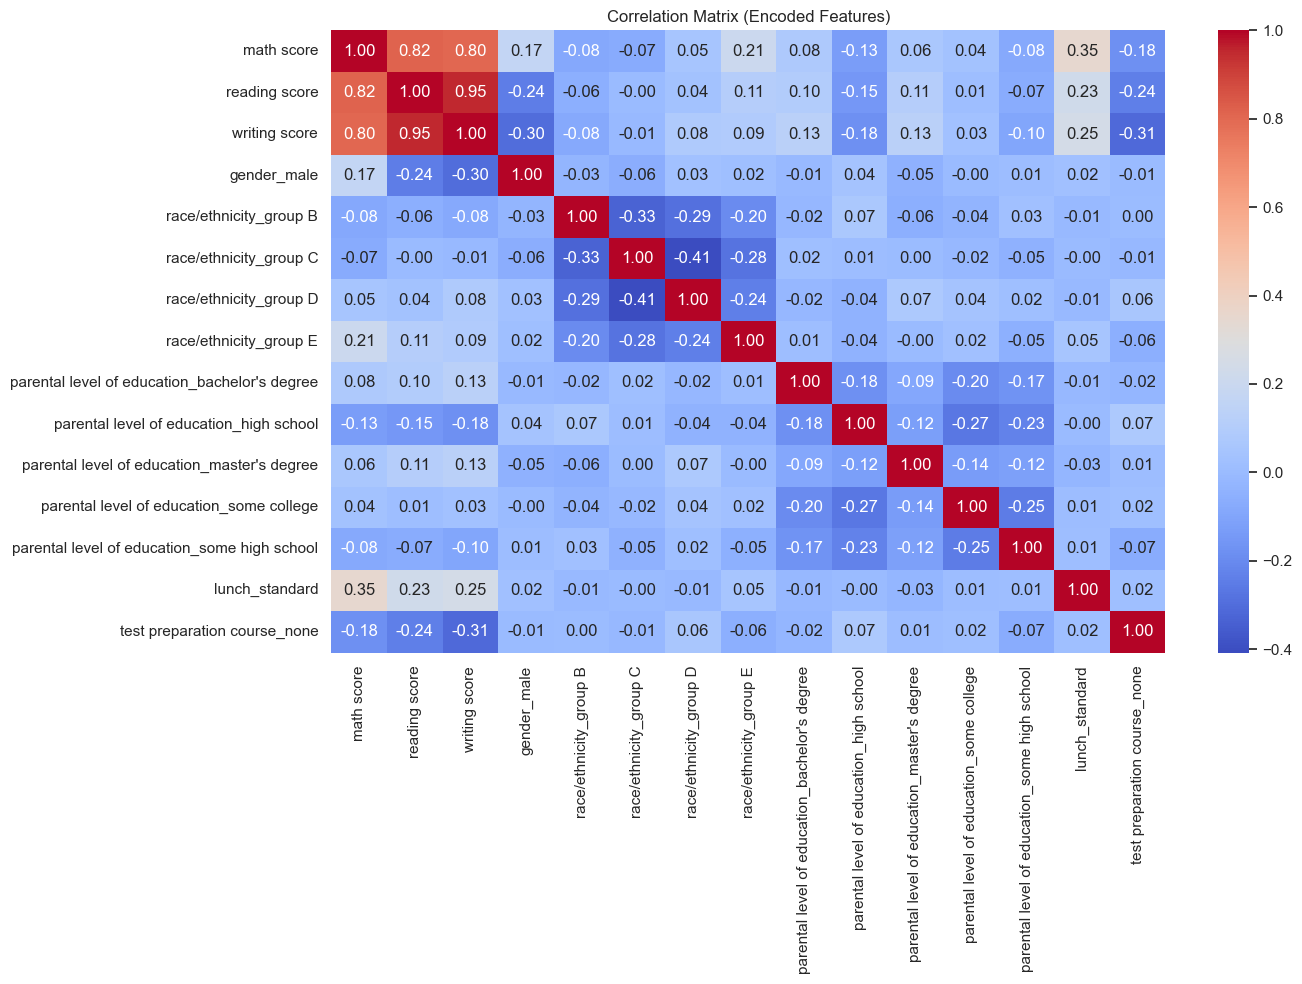

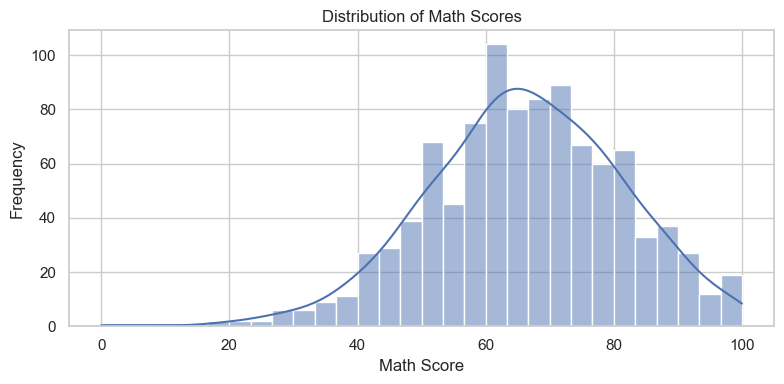

In [4]:
# Step 4: Visualize correlation and distribution
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Encoded Features)")
plt.tight_layout()
plt.show()

# Distribution of math scores
plt.figure(figsize=(8, 4))
sns.histplot(df["math score"], kde=True, bins=30)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [5]:
# Step 5: Train-test split and model training
X = df_encoded.drop(columns=["math score"])
y = df_encoded["math score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8804
MAE: 4.2148
RMSE: 5.3940


In [6]:
# Step 6: Coefficient analysis
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
coef_df.loc[len(coef_df.index)] = ["Intercept", model.intercept_]
coef_df

,Feature,Coefficient
0,reading score,0.236023
1,writing score,0.724148
2,gender_male,13.064884
3,race/ethnicity_group B,0.359323
4,race/ethnicity_group C,-0.625617
5,race/ethnicity_group D,-0.613236
6,race/ethnicity_group E,4.892649
7,parental level of education_bachelor's degree,-0.716901
8,parental level of education_high school,0.929312
9,parental level of education_master's degree,-1.400489


In [7]:
# Step 7: Analyze test prep and parental education effect
coef_df[coef_df["Feature"].str.contains("test preparation|parental level", case=False, regex=True)]

,Feature,Coefficient
7,parental level of education_bachelor's degree,-0.716901
8,parental level of education_high school,0.929312
9,parental level of education_master's degree,-1.400489
10,parental level of education_some college,0.998856
11,parental level of education_some high school,0.756470
13,test preparation course_none,3.289642


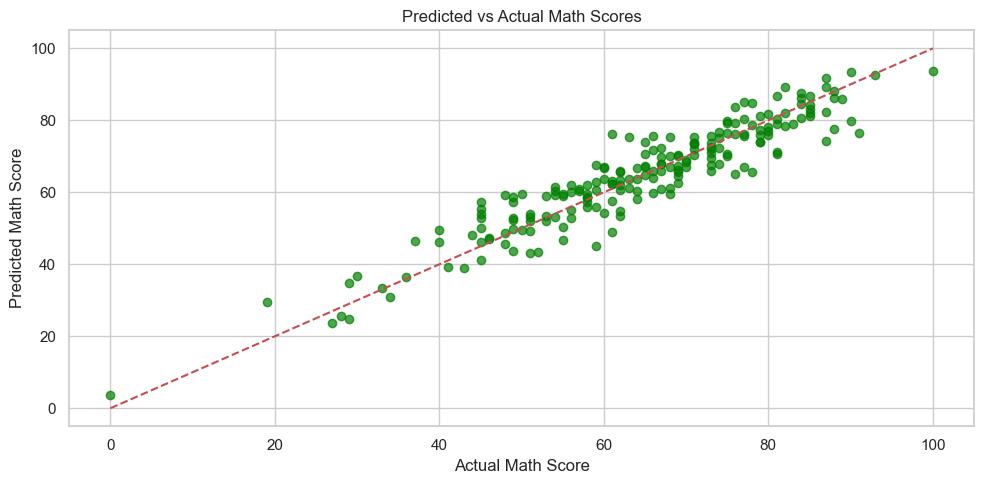

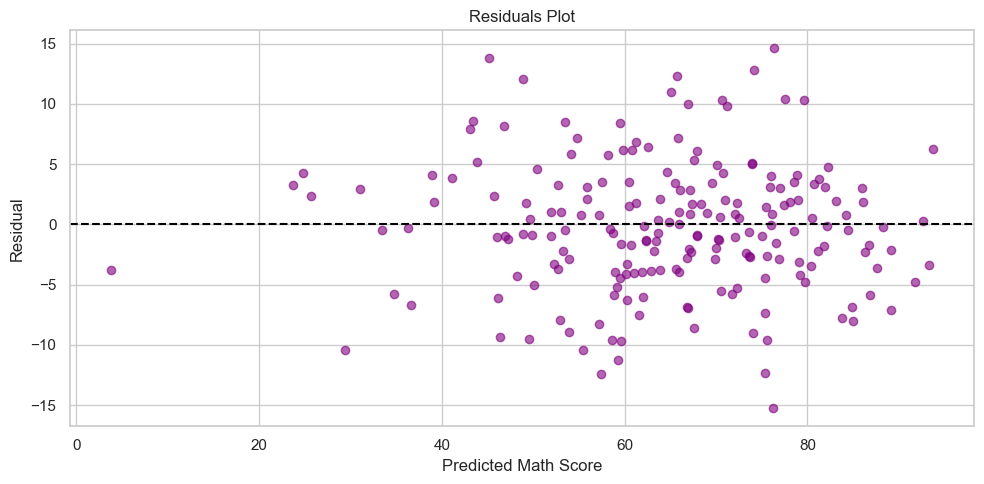

In [8]:
# Step 8: Plot predictions vs actuals and residuals

# Predicted vs Actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Predicted vs Actual Math Scores")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals Plot")
plt.xlabel("Predicted Math Score")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()